In [33]:
using Plots, StatsPlots
using Statistics
using Distributions
using DelimitedFiles

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1317


# Zadanie 1

In [2]:
dtx=open("lista7_zad1.txt")
dat0=readlines(dtx)
data=[]
for el in dat0
    push!(data,parse(Float64, el))
end;

## Błąd pierwszego rodzaju

Prawdopodobieństwo odrzucenia hipotezy zerowej, gdy ta jest prawdziwa. Jego teoretyczna wartość jest równa pozimowi istotności alpha

In [6]:
mu=1.5
sig=0.2
alpha=0.001
n=1000;

In [7]:
function Irodzaj(mu_alt,alpha=0.05,n=1000,N=1000,mu=1.5,sig=0.2,mode=0)
    ct=0
    for i in 1:N
        proba=rand(Normal(mu,sig),n)
        Z=(mean(proba)-mu)/(sig/sqrt(n))         #wartość statystyki tesowej Z
        
        if mode == 0                                       #obszar krytyczny mu_alt!=1.5
            ob_kryt = quantile.(Normal(), 1-alpha/2)
            if (Z <= -ob_kryt) || (Z>=ob_kryt)
                ct+=1
            end
        elseif mode == 1                                   #obszar krytyczny mu_alt>1.5
            ob_kryt = quantile.(Normal(), 1-alpha)
            if Z >= ob_kryt
                ct+=1
            end
        elseif mode == 2                                   #obszar krytyczny mu_alt<1.5
            ob_kryt = quantile.(Normal(), alpha)
            if Z <= ob_kryt
                ct+=1
            end
        end
        
    end
    return ct/N
end

Irodzaj (generic function with 7 methods)

In [252]:
l=[]
l1=[]
l2=[]
for i in 1:100
    append!(l,Irodzaj(0,0.01,1000,1000,1.49,0.2,0))
    append!(l1,Irodzaj(0,0.05,1000,1000,1.49,0.2,0))
    append!(l2,Irodzaj(0,0.1,1000,1000,1.49,0.2,0))
end

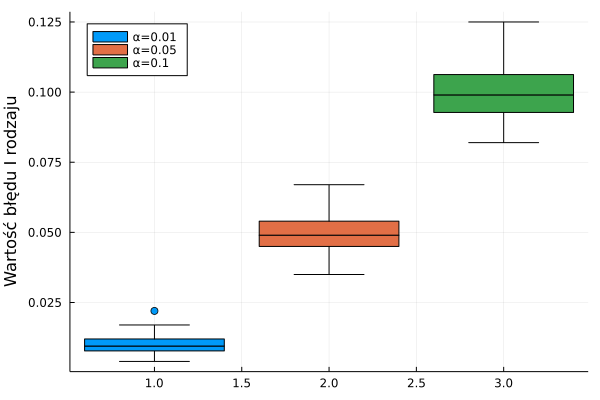

In [253]:
boxplot(l,legend=:topleft,label="α=0.01",ylabel="Wartość błędu I rodzaju")
boxplot!(l1,label="α=0.05")
boxplot!(l2,label="α=0.1")
#png("Z3.Irodzaj")

In [254]:
[mean(l1),
mean(l2),
mean(l3)]

3-element Vector{Float64}:
 0.049140000000000045
 0.09998000000000001
 0.9416000000000001

# Błąd drugiego rodzaju
Błąd drugiego rodzaju to prawdopodobieństwo przyjęcia fałszywej hipotezy zerowej i odrzucenia prawdziwej hipotezy alternatywnej.

In [54]:
function IIrodzaj(mu_alt,alpha=0.05,n=1000,N=1000,mu=1.5,sig=0.2,mode=0)
    ct=0
    for i in 1:N
        proba=rand(Normal(mu_alt,sig),n)
        Z=(mean(proba)-mu)/(sig/sqrt(n))         #wartość statystyki tesowej Z
        
        if mode == 0                                       #obszar krytyczny mu_alt!=1.5
            ob_kryt = quantile.(Normal(), 1-alpha/2)
            if !((Z <= -ob_kryt) || (Z>=ob_kryt))
                ct+=1
            end
        elseif mode == 1                                   #obszar krytyczny mu_alt>1.5
            ob_kryt = quantile.(Normal(), 1-alpha)
            if !(Z >= ob_kryt)
                ct+=1
            end
        elseif mode == 2                                   #obszar krytyczny mu_alt<1.5
            ob_kryt = quantile.(Normal(), alpha)
            if !(Z <= ob_kryt)
                ct+=1
            end
        end
        
    end
    return ct/N
end

IIrodzaj (generic function with 7 methods)

In [205]:
l=[]
l1=[]
l2=[]
l3=[]
for i in 1:100
    append!(l,IIrodzaj(1.52,0.01,1000,1000,1.5,0.2,0))
    append!(l1,IIrodzaj(1.51,0.01,1000,1000,1.5,0.2,0))
    append!(l2,IIrodzaj(1.49,0.01,1000,1000,1.5,0.2,0))
    append!(l3,IIrodzaj(1.48,0.01,1000,1000,1.5,0.2,0))
end

In [206]:
boxplot(l,legend=:topleft,label="μ=1.52",ylabel="Wartość błędu II rodzaju")
boxplot!(l1,label="μ=1.51")
boxplot!(l2,label="μ=1.49")
boxplot!(l3,label="μ=1.48")
png("Z3.mu1")

In [208]:
[median(l),median(l1),median(l2),median(l3)]
[1-median(l),1-median(l1),1-median(l2),1-median(l3)]

4-element Vector{Float64}:
 0.72
 0.1605000000000001
 0.15650000000000008
 0.721

In [209]:
l=[]
l1=[]
l2=[]
for i in 1:100
    append!(l,IIrodzaj(1.51,0.05,1000,1000,1.5,0.2,1))
    append!(l1,IIrodzaj(1.52,0.05,1000,1000,1.5,0.2,1))
    append!(l2,IIrodzaj(1.53,0.05,1000,1000,1.5,0.2,1))
end

In [210]:
boxplot(l,legend=:topright,label="μ=1.51",ylabel="Wartość błędu II rodzaju")
boxplot!(l1,label="μ=1.52")
boxplot!(l2,label="μ=1.53")
png("Z3.mu2")

In [212]:
#[median(l),median(l1),median(l2)]
[1-median(l),1-median(l1),1-median(l2)]

3-element Vector{Float64}:
 0.47350000000000003
 0.9359999999999999
 0.999

In [225]:
l=[]
l1=[]
l2=[]
for i in 1:100
    append!(l,IIrodzaj(1.49,0.05,1000,1000,1.5,0.2,2))
    append!(l1,IIrodzaj(1.48,0.05,1000,1000,1.5,0.2,2))
    append!(l2,IIrodzaj(1.47,0.05,1000,1000,1.5,0.2,2))
end

In [226]:
boxplot(l,legend=:topright,label="μ=1.49",ylabel="Wartość błędu II rodzaju")
boxplot!(l1,label="μ=1.48")
boxplot!(l2,label="μ=1.47")
png("Z3.mu3")

In [228]:
#[median(l),median(l1),median(l2)]
[1-median(l),1-median(l1),1-median(l2)]

3-element Vector{Float64}:
 0.477
 0.9355
 0.999

# Weryfikacja hipotez

In [132]:
mu0=1.5 #H0
sig=0.2
alpha=0.49
n=length(data)

1000

0.02506890825871106
-7.041450899607126
statystyka z jest w obszarze przyjęć- H1 jest fałszywa, , p-wartość 0.9999999999990488

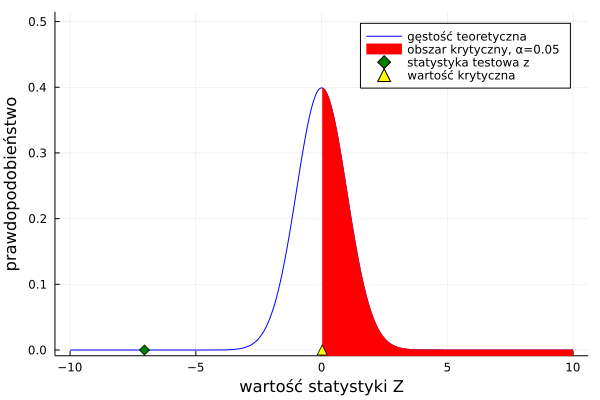

In [133]:
# H1 mu > 1.5 
L=Normal(0,1)

kwantyl1=quantile(L,1-alpha)
println(kwantyl1)

z = (mean(data)-mu0)/(sig/sqrt(n)) 
println(z)

p = 1-cdf(L,z)

if z>kwantyl1
    print("statystyka z jest w obszarze krytycznym - H1 prawdziwa, p-wartość $p")
else
    print("statystyka z jest w obszarze przyjęć- H1 jest fałszywa, , p-wartość $p")
end
#plot(x->pdf(L, x))
A=-10:0.002:10
ys = [pdf(L, x) for x in A]
A1 = kwantyl1:0.002:10
ys1 = [pdf(L, x) for x in A1]

plot(A,ys,ylim=[0.006,0.5], label = "gęstość teoretyczna", xlabel="wartość statystyki Z", ylabel="prawdopodobieństwo", color=:blue)
plot!(A1,ys1, fillrange=-1, color=:red, label = "obszar krytyczny, α=0.05")
#Plots.scatter!([kwantyl1],0:0.2:1)
scatter!([z],[0], label = "statystyka testowa z", markershape=:diamond, color=:green, markersize=5)
scatter!([kwantyl1],[0], label = "wartość krytyczna", markershape=:utriangle, color=:yellow, markersize=5)
#Plots.scatter!([kwantyl2],0:0.2:1)
#png("Z1.2")

-7.041450899607126
statystyka z jest w obszarze krytycznym - H1 prawdziwa, , p-wartość 9.512412912411132e-13

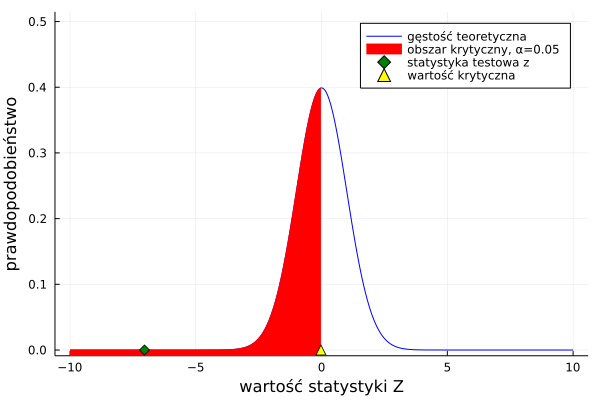

In [134]:
# H1 mu_alt<1.5
L=Normal(0,1)

kwantyl2=quantile(L,alpha)

z = (mean(data)-mu0)/(sig/sqrt(n))

println(z)

p = cdf(L,z)

if z<kwantyl2
    print("statystyka z jest w obszarze krytycznym - H1 prawdziwa, , p-wartość $p")
else
    print("statystyka z jest w obszarze przyjęć- H1 fałszywa, , p-wartość $p")
end

A=-10:0.002:10
ys = [pdf(L, x) for x in A]
A1 = -10:0.002:kwantyl2
ys1 = [pdf(L, x) for x in A1]

plot(A,ys,ylim=[0.006,0.5], label = "gęstość teoretyczna", xlabel="wartość statystyki Z", ylabel="prawdopodobieństwo", color=:blue)
plot!(A1,ys1, fillrange=-1, color=:red, label = "obszar krytyczny, α=0.05")
scatter!([z],[0], label = "statystyka testowa z", markershape=:diamond, color=:green, markersize=5)
scatter!([kwantyl2],[0], label = "wartość krytyczna", color=:yellow, markershape=:utriangle, markersize=5)
#png("Z1.3")

0.690308823933034
statystyka z jest w obszarze krytycznym - H1 prawdziwa, p-wartość 1.9024781749976682e-12

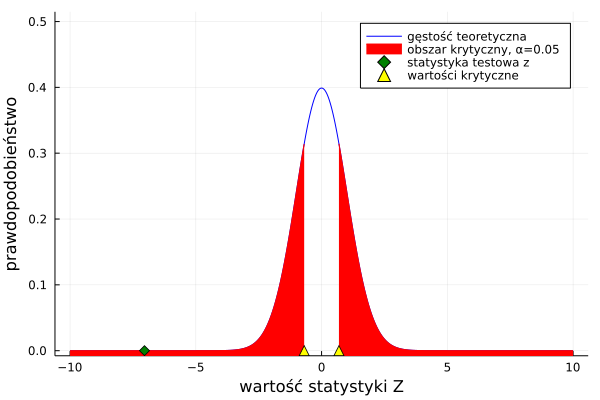

In [135]:
# H1 mu_alt!=1.5
L=Normal(0,1)

kwantyl3=quantile(L,1-alpha/2)
println(kwantyl3)

z= (mean(data)-mu0)/(sig/sqrt(n))

p = 2-(2*cdf(L,abs(z)))

if (z>kwantyl3) || (z<-kwantyl3)
    print("statystyka z jest w obszarze krytycznym - H1 prawdziwa, p-wartość $p")
else
    print("statystyka z jest w obszarze przyjęć- H1 fałszywa, p-wartość $p")
end

A=-10:0.002:10
ys = [pdf(L, x) for x in A]
A1 = kwantyl3:0.002:10
ys1 = [pdf(L, x) for x in A1]
A2 = -10:0.002:-kwantyl3
ys2 = [pdf(L, x) for x in A2]

plot(A,ys,ylim=[0.007,0.5], label = "gęstość teoretyczna", xlabel="wartość statystyki Z", ylabel="prawdopodobieństwo", color=:blue)
plot!(A1,ys1, fillrange=-1, color=:red, label = "")
plot!(A2,ys2, fillrange=-1, color=:red, label = "obszar krytyczny, α=0.05")
scatter!([z],[0], label = "statystyka testowa z", markershape=:diamond, markersize=5, color=:green)
scatter!([kwantyl3, -kwantyl3],[0, 0], label = "wartości krytyczne", markershape=:utriangle, color=:yellow, markersize=5)
#png("Z1.1")

# Zadanie 2

In [250]:
X = readdlm("lista7_zad2.txt");

In [179]:
S2 = var(X)
N = 1000
σ0 = 1.5

1.5

In [180]:
function T(N, σ0, S2) # statystyka testowa
    return (N-1)*S2/σ0
end

T (generic function with 1 method)

In [181]:
function P(z, Z=Chisq(999); m="<") #p wartości
    
    if m == "<"
        return cdf(Z, z)
    elseif m == ">"
        return 1 - cdf(Z, z)
    else
        return 2-2*cdf(Z, abs(z))
    end
end

P (generic function with 2 methods)

In [182]:
z = T(N, σ0, S2)

1110.9684489015067

In [183]:
P(z, m = "≠")

0.015023252487834649

In [184]:
Y = Chisq(999)

Chisq{Float64}(ν=999.0)

In [185]:
χ1 = quantile(Y, 0.05) #σ<1.5
χ2 = quantile(Y, 0.95) #σ>1.5
χ3 = quantile(Y, 0.025) #σ≠1.5
χ4 = quantile(Y, 0.975)

println("(-∞, $χ1"* "]", " - σ<1.5")
println("[$χ2"*", +∞)", " - σ>1.5")
println("(-∞, $χ3"* "], [$χ4"*", +∞)", " - σ≠1.5")

println(P(z, m = "<"),  " - p wartość dla mniejszej od 1.5")
println(P(z, m = ">"), " - p wartość dla większej od 1.5")
println(P(z, m = "≠"), " - p wartość dla różnej od 1.5")


(-∞, 926.6311609204329] - σ<1.5
[1073.6426506574246, +∞) - σ>1.5
(-∞, 913.3009983021134], [1088.4870677259353, +∞) - σ≠1.5
0.9924883737560827 - p wartość dla mniejszej od 1.5
0.007511626243917324 - p wartość dla większej od 1.5
0.015023252487834649 - p wartość dla różnej od 1.5


## Wnioski:

-nie mniejsza niż 1.5
-nie równa 1.5
-większa niż 1.5

In [194]:
Α = 750:0.1:1250
ys = [pdf(Chisq(999), x) for x in Α]

B = χ2:0.1:1250
zs = [pdf(Chisq(999), x) for x in B]

plot(Α, ys, ylim=[0.00006,0.0091], label="gęstość teoretyczna", color=:blue, xlabel="wartość statystyki Z", ylabel="prawdopodobieństwo")
plot!(B, zs, fillrange=-1, color=:red, label="obszar krytyczny")
scatter!([z], [0], label = "statystyka testowa z", markershape=:diamond, color=:green, markersize=5)
scatter!([χ2], [0], label = "wartość krytyczna", markershape=:utriangle, color=:yellow, markersize=5)
png("Z2.2")

In [195]:
B = 750:0.1:χ1
zs = [pdf(Chisq(999), x) for x in B]

plot(Α, ys, ylim=[0.00006,0.0091], label="gęstość teoretyczna", color=:blue, xlabel="wartość statystyki Z", ylabel="prawdopodobieństwo")
plot!(B, zs, fillrange=-1, color=:red, label="obszar krytyczny")
scatter!([z], [0], label = "statystyka testowa z", markershape=:diamond, color=:green, markersize=5)
scatter!([χ1], [0], label = "wartość krytyczna", markershape=:utriangle, color=:yellow, markersize=5)
png("Z2.3")

In [196]:
B = 750:0.1:χ3
zs = [pdf(Chisq(999), x) for x in B]

B1 = χ4:0.1:1250
zs1 = [pdf(Chisq(999), x) for x in B1]

plot(B1, zs1, fillrange=-1, color=:red, label="")
plot!(Α, ys, ylim=[0.00006,0.0091], label="gęstość teoretyczna", color=:blue, legend=true,xlabel="wartość statystyki Z", ylabel="prawdopodobieństwo")
plot!(B, zs, fillrange=-1, color=:red, label="obszar krytyczny")

scatter!([z], [0], label = "statystyka testowa z", markershape=:diamond, color=:green, markersize=5)
scatter!([χ3, χ4], [0, 0], label = "wartości krytyczne", markershape=:utriangle, color=:yellow, markersize=5)
png("Z2.1")

In [257]:
function Iwariancja(
        σ0 = 1.5;
        μ = 0.2,
        α = 0.05,
        n = 1000,
        N = 1000,
        mode = "≠")
    
    s = 0
    distribution = Chisq(n-1)
    
    if mode == "≠"
        χ1 = quantile(distribution, α/2)
        χ2 = quantile(distribution, 1-α/2)
        
        for i in 1:N
        
            Xs = rand(Normal(μ, sqrt(σ0)), n)
            Z = T(n, σ0, var(Xs))
            if Z <= χ1 || Z >= χ2
                
                s += 1
            
            end
            
        end
        
    elseif mode == ">"
        
        χ = quantile(distribution, 1-α)
        
        for i in 1:N
        
            Xs = rand(Normal(μ, sqrt(σ0)), n)
            Z = T(n, σ0, var(Xs))

            if Z >= χ
                
                s += 1
            
            end
            
        end
        
    elseif mode == "<"
        
        χ = quantile(distribution, α)
        
        for i in 1:N
        
            Xs = rand(Normal(μ, sqrt(σ0)), n)
            Z = T(n, σ0, var(Xs))

            if Z <= χ
                
                s += 1
            
            end
            
        end
        
    else
        println("mode should be <, > or ≠")
    end

    return s/N
    
end

Iwariancja (generic function with 2 methods)

In [258]:
function IIwariancja(
        σ_alt;
        α=0.05, 
        μ=0.2, 
        σ0=1.5, 
        n=1000, 
        N=1000,
        mode = "≠")
    
    s = 0
    distribution = Chisq(n-1)
    
    if mode == "≠"

        χ1 = quantile(distribution, α/2)
        χ2 = quantile(distribution, 1-α/2)
    
        for i in 1:N

            Xs = rand(Normal(μ, sqrt(σ_alt)), n)
            Z = T(n, σ0, var(Xs))
        
            if Z > χ1 && Z < χ2
                
                s += 1
            
            end
     
        end
    
    elseif mode == ">"
        
        χ = quantile(distribution, 1-α)
        
        for i in 1:N

            Xs = rand(Normal(μ, sqrt(σ_alt)), n)
            Z = T(n, σ0, var(Xs))
        
            if Z < χ
                
                s += 1
            
            end
     
        end
        
    elseif mode == "<"
        
        χ = quantile(distribution, α)
        
        for i in 1:N

            Xs = rand(Normal(μ, sqrt(σ_alt)), n)
            Z = T(n, σ0, var(Xs))
        
            if Z > χ
                
                s += 1
            
            end
     
        end
        
    else
        println("mode should be <, > or ≠")
        
    end 
    
    return s/N
    
end

IIwariancja (generic function with 1 method)

In [260]:
l=[]
l1=[]
l2=[]
for i in 1:100
    append!(l,Iwariancja(1.5;
        μ = 0.2,
        α = 0.01,
        n = 1000,
        N = 1000,
        mode = "≠"))
    append!(l1,Iwariancja(1.5;
        μ = 0.2,
        α = 0.05,
        n = 1000,
        N = 1000,
        mode = "≠"))
    append!(l2,Iwariancja(1.5;
        μ = 0.2,
        α = 0.1,
        n = 1000,
        N = 1000,
        mode = "≠"))
end

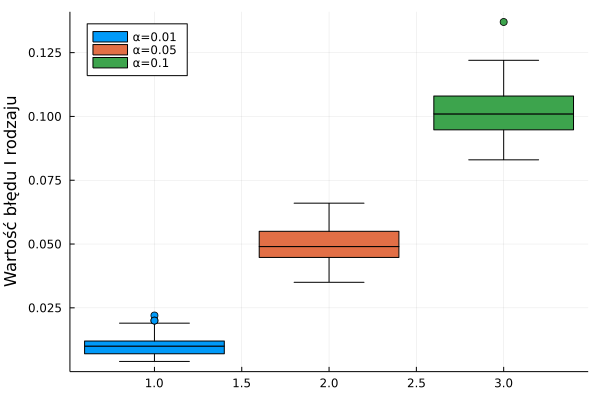

In [261]:
boxplot(l,legend=:topleft,label="α=0.01",ylabel="Wartość błędu I rodzaju")
boxplot!(l1,label="α=0.05")
boxplot!(l2,label="α=0.1")
#png("Z3.Iwariancja")

In [262]:
[mean(l1),
mean(l2),
mean(l3)]

3-element Vector{Float64}:
 0.04992999999999999
 0.10203999999999999
 0.9416000000000001

In [204]:
[median(l),median(l1),median(l2)]

3-element Vector{Float64}:
 0.01
 0.049
 0.098

In [263]:
l=[]
l1=[]
l2=[]
l3=[]
for i in 1:100
    append!(l,IIwariancja(1.52,mode="≠"))
    append!(l1,IIwariancja(1.51,mode="≠"))
    append!(l2,IIwariancja(1.49,mode="≠"))
    append!(l3,IIwariancja(1.48,mode="≠"))
end

In [264]:
boxplot(l,legend=:topleft,label="σ²=1.52",ylabel="Wartość błędu II rodzaju")
boxplot!(l1,label="σ²=1.51")
boxplot!(l2,label="σ²=1.49")
boxplot!(l3,label="σ²=1.48")
#png("Z3.war1")

In [265]:
[mean(l),mean(l1),mean(l2),mean(l3)]
[1-mean(l),1-mean(l1),1-mean(l2),1-mean(l3)]

4-element Vector{Float64}:
 0.06069000000000013
 0.05371000000000026
 0.051730000000000276
 0.05876999999999999

In [266]:
l=[]
l1=[]
l2=[]
for i in 1:100
    append!(l,IIwariancja(1.51,mode=">"))
    append!(l1,IIwariancja(1.52,mode=">"))
    append!(l2,IIwariancja(1.53,mode=">"))
end

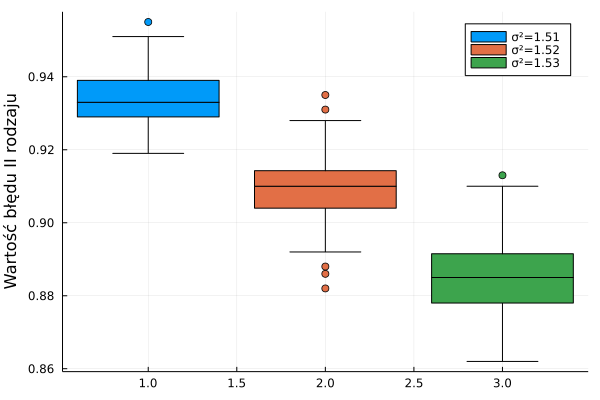

In [267]:
boxplot(l,legend=:topright,label="σ²=1.51",ylabel="Wartość błędu II rodzaju")
boxplot!(l1,label="σ²=1.52")
boxplot!(l2,label="σ²=1.53")
#png("Z3.war2")

In [271]:
[mean(l),mean(l1),mean(l2)]
[1-mean(l),1-mean(l1),1-mean(l2)]

3-element Vector{Float64}:
 0.06626999999999972
 0.09053000000000011
 0.11491999999999958

In [240]:
l=[]
l1=[]
l2=[]
for i in 1:100
    append!(l,IIwariancja(1.49,mode="<"))
    append!(l1,IIwariancja(1.48,mode="<"))
    append!(l2,IIwariancja(1.47,mode="<"))
end

In [241]:
boxplot(l,legend=:topright,label="σ²=1.49",ylabel="Wartość błędu II rodzaju")
boxplot!(l1,label="σ²=1.48")
boxplot!(l2,label="σ²=1.47")
png("Z3.war3")

In [243]:
#[median(l),median(l1),median(l2)]
[1-median(l),1-median(l1),1-median(l2)]

3-element Vector{Float64}:
 0.06599999999999995
 0.08899999999999997
 0.11349999999999993

In [249]:
histogram(data,xlabel="Xᵢ",ylabel="Ilość wystąpień",legend=false)
png("hist1")
mean(data)

1.4554659542499997

In [251]:
histogram(X,xlabel="Xᵢ",ylabel="Ilość wystąpień",legend=false)
png("hist2")
var(X)

1.6681207941464065